In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("boston.csv")

In [4]:
X = df.drop("PRICE", axis=1)
y= df["PRICE"]

In [5]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X, y)
lin_final_pred= lin_regr.predict(X)

In [6]:
print("R^2 :       ", round(r2_score(y,lin_final_pred),2))
print("MAE :       ", round(mean_absolute_error(y,lin_final_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y,lin_final_pred)),2))

R^2 :        0.74
MAE :        3.27
RMSE :       4.68


In [7]:
lin_final_val = pd.Series(lin_final_pred)

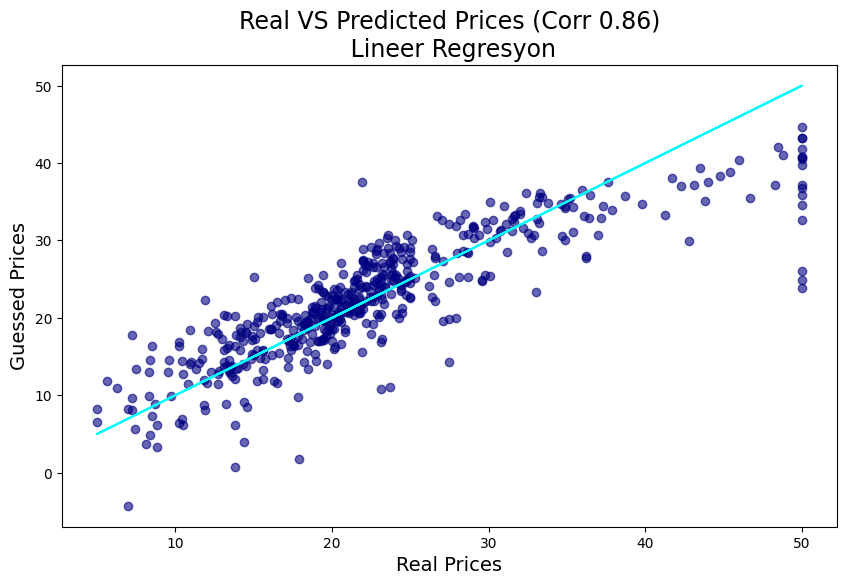

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x=y, y=lin_final_val, c='navy', alpha=0.6)
plt.plot(y, y, color='cyan')

corr = round(y.corr(lin_final_val), 2)

plt.xlabel('Real Prices', fontsize=14)
plt.ylabel('Guessed Prices', fontsize=14)
plt.title(f'Real VS Predicted Prices (Corr {corr})\n Lineer Regresyon', fontsize=17);

In [11]:
residuals = lin_final_val - y


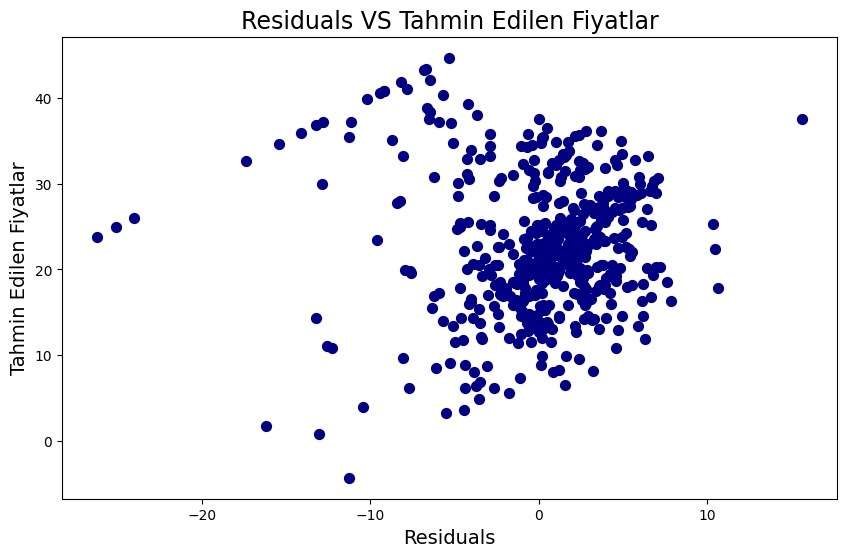

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(x=residuals, y=lin_final_val, c='navy', s=50)

plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Tahmin Edilen Fiyatlar', fontsize=14)
plt.title(f'Residuals VS Tahmin Edilen Fiyatlar', fontsize=17);

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_conv = PolynomialFeatures(degree=2,include_bias=False)

In [17]:
poly_x = poly_conv.fit_transform(X)

In [18]:
poly_final_model = LinearRegression(fit_intercept=True)

In [19]:
poly_final_model.fit(poly_x,y)

LinearRegression()

In [20]:
poly_final_pred = poly_final_model.predict(poly_x)

In [21]:
print("R^2 :       ", round(r2_score(y,poly_final_pred),2))
print("MAE :       ", round(mean_absolute_error(y,poly_final_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y,poly_final_pred)),2))

R^2 :        0.93
MAE :        1.81
RMSE :       2.45


In [22]:
type(poly_final_pred)

numpy.ndarray

In [23]:
poly_final_pred

array([24.7918342 , 22.70683946, 32.63160085, 31.98777402, 32.14243885,
       26.0609507 , 21.34306433, 18.21773932, 16.27112006, 20.46907636,
       20.22653312, 20.47085639, 23.16248378, 19.45898248, 17.86367325,
       19.29435241, 21.75020177, 16.98593961, 15.0443528 , 18.00971855,
       13.86842789, 16.39258545, 15.63958619, 13.61849405, 14.98171522,
       14.87761989, 15.37085641, 15.90954566, 17.4617919 , 19.53753621,
       14.53245981, 15.79087201, 16.85840451, 14.6499062 , 15.18004347,
       22.69969054, 21.73718228, 22.32985627, 23.72403723, 29.13861873,
       35.48324908, 31.37865909, 23.73088239, 25.17423651, 22.36212674,
       19.33907308, 21.17815249, 19.43828228, 18.57872846, 18.86144737,
       21.14845643, 21.4748812 , 27.41144324, 21.77955086, 17.94396966,
       32.21223227, 24.47988909, 29.91280597, 19.33192397, 17.67189932,
       16.39483141, 16.79637422, 21.66327543, 23.77964695, 31.9559757 ,
       26.1580315 , 19.20450036, 19.19802452, 16.94879776, 18.59

In [28]:
poly_final_val = pd.Series(poly_final_pred)

Text(0.5, 1.0, 'Real vs Predicted Prices and Corr : 0.96')

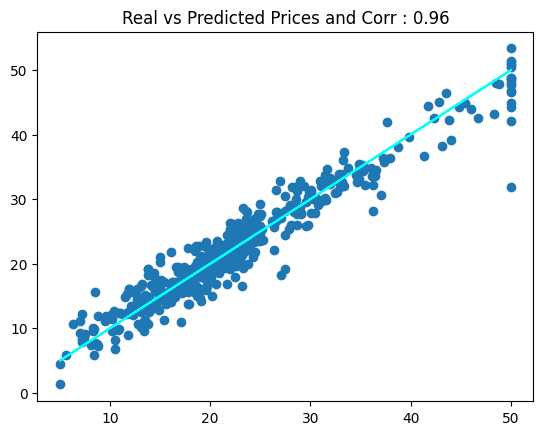

In [36]:
plt.scatter(x=y, y= poly_final_pred)
plt.plot(y,y,color="cyan")
corr = round(y.corr(poly_final_val),2)
plt.title(f"Real vs Predicted Prices and Corr : {corr}")

In [37]:
poly_residuals = poly_final_val - y

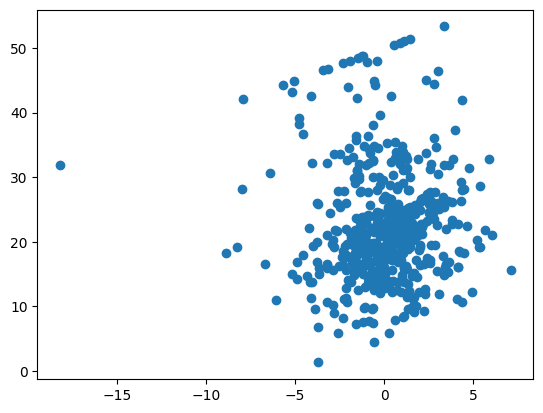

In [38]:
plt.scatter(x=poly_residuals,y=poly_final_val)